In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import time
import plotly.graph_objects as go

### Try this for random 3D field
https://github.com/NumericalEnvironmental/RBF-based_correlated_random_field_generator 

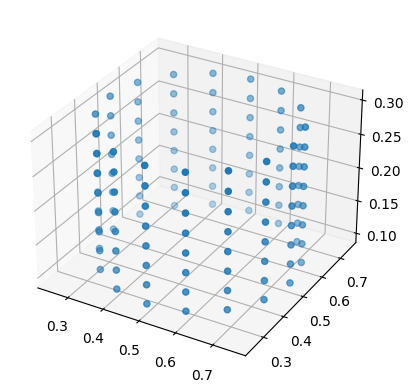

In [3]:
def circle_points(r, n): # Radius, number of points
    t = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = r * np.cos(t)
    y = r * np.sin(t)
    circle = np.c_[x, y]
    return circle + 0.5

r = 0.25
n = 16
circle = circle_points(r, n)
z_cyl = np.linspace(0.1,0.3,8)
transducers = np.zeros((len(z_cyl)*len(circle[:,0]), 3))
for i in range(len(z_cyl)):
    for j in range(len(circle[:,0])):
        transducers[i*len(circle[:,0])+j, 0] = circle[j,0]
        transducers[i*len(circle[:,0])+j, 1] = circle[j,1] 
        transducers[i*len(circle[:,0])+j, 2]= z_cyl[i]
    
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(transducers[:,0], transducers[:,1], transducers[:,2], zdir='z')

### Elliptical Cone (blunted cone)

(-0.010000000000000002, 0.21000000000000002, -0.015, 0.315)

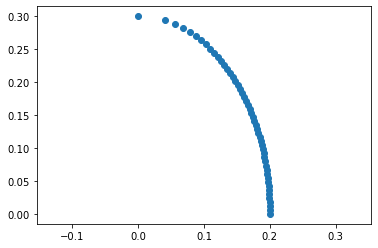

In [208]:
R = 0.2
L = 0.3
x = np.linspace(0, L, 50)
y = R * np.sqrt(1-(x**2/L**2))
plt.scatter(y, x)
plt.axis('equal')

In [243]:
x = np.linspace(0,1,64)
y = np.linspace(0,1,64)
z = np.linspace(0,0.5,64)
x, y, z = np.meshgrid(x,y,z)
x = x.flatten(); y = y.flatten(); z = z.flatten()
u = np.zeros(x.shape)
indices = np.arange(x.shape[0])

mask1 = z < L
mask2 = np.sqrt((x[mask1]-0.5)**2  + (y[mask1]-0.5)**2) < (R * np.sqrt(1-(z[mask1]**2/L**2)))
u[indices[mask1][mask2]] = 1
u_breast = u.reshape((64,64,64))

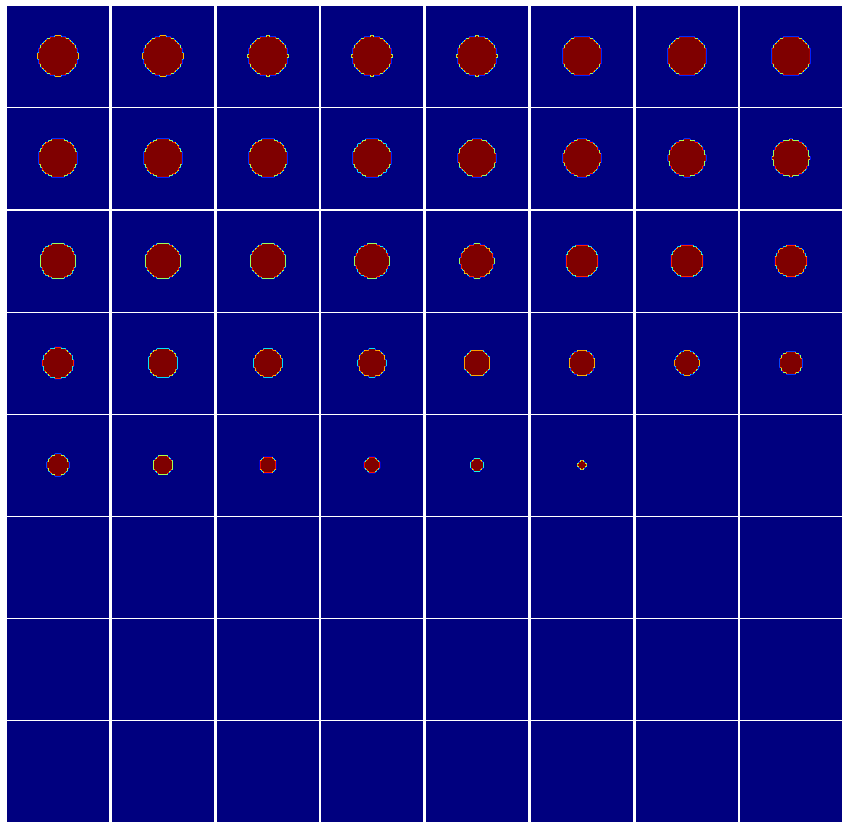

In [244]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(u_breast[:,:,i], cmap='jet')
    plt.axis('off')
    
plt.subplots_adjust(wspace=.01, hspace=.01)

### Combine with transducers

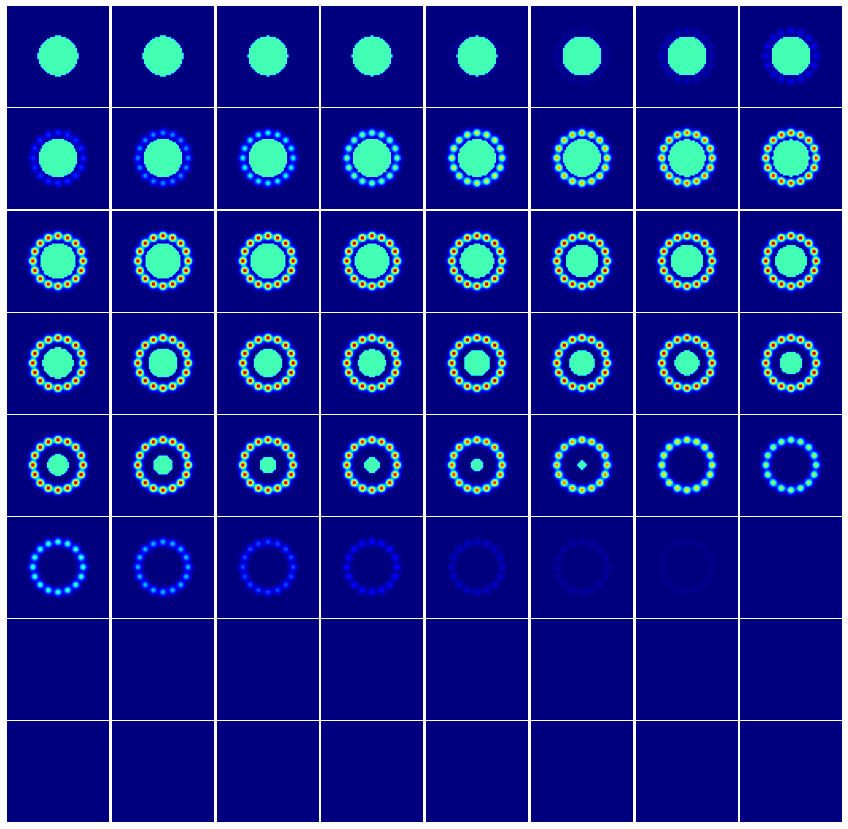

In [245]:
size = 64
sigma_x = 0.025
sigma_y = 0.025
sigma_z = 0.025

x = np.linspace(0, 1, size)
y = np.linspace(0, 1, size)
z = np.linspace(0, 0.5, size)

x, y, z = np.meshgrid(x, y, z)
u = (1/(2*np.pi*sigma_x*sigma_y*sigma_z) * np.exp(-((x-0.5)**2/(2*sigma_x**2) + (y-0.5)**2/(2*sigma_y**2) + (z-0.5)**2/(2*sigma_z**2))))
vmin = np.min(u); vmax = np.max(u);

u = x*0
for i in range(transducers.shape[0]):
    u_temp = (1/(2*np.pi*sigma_x*sigma_y*sigma_z) * np.exp(-((x-transducers[i,0])**2/(2*sigma_x**2) + (y-transducers[i,1])**2/(2*sigma_y**2) + (z-transducers[i,2])**2/(2*sigma_z**2))))/vmax
    u += u_temp
    
vmin_sum = np.min(u); vmax_sum = np.max(u)   

plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(u[:,:,i] + u_breast[:,:,i], cmap='jet', vmin = vmin_sum, vmax = vmax_sum)
    plt.axis('off')
    
plt.subplots_adjust(wspace=.01, hspace=.01)